<a href="https://colab.research.google.com/github/RyandraAdiatma/ProjekPPh/blob/main/PPh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Display the resulting DataFrame
if df_pph_per_year is not None:
    display(df_pph_per_year)

# Print the calculated total PPh per year
if df_pph_per_year is not None:
    print("\nTotal PPh per year:")
    print(df_pph_per_year)

NameError: name 'df_pph_per_year' is not defined

In [ ]:
# Initialize df_pph_per_year to None before it's potentially defined
df_pph_per_year = None

# ... (previous code cells)

# Data wrangling (assuming this is the cell where df_pph_per_year is intended to be created)
import pandas as pd
import numpy as np

# 1. Handle missing values
# Remove rows with missing values in 'tahun' or 'laba_sebelum_pajak'
# Ensure df is defined before this point, e.g., from the data loading step
if df is not None: # Added a check to ensure df exists
    df = df.dropna(subset=['tahun', 'laba_sebelum_pajak'])

    # 2. Convert 'tahun' to datetime and handle invalid years
    df['tahun'] = pd.to_numeric(df['tahun'], errors='coerce').astype('Int64')
    df = df[df['tahun'] >= 2020]  # Remove rows with invalid years

    # 3. Convert numerical columns to numeric data types
    for col in ['pendapatan', 'beban_operasional', 'penyusutan_transaksi', 'laba_sebelum_pajak', 'total_penyusutan_aset']:
        df[col] = df[col].astype(str).str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    # 4. Aggregate data and handle errors
    try:
      df_pph_per_year = df.groupby('tahun')['laba_sebelum_pajak'].sum().reset_index()
    except Exception as e:
      print(f"An error occurred during aggregation: {e}")
      df_pph_per_year = None
else:
    print("DataFrame 'df' was not loaded successfully, skipping aggregation.")
    df_pph_per_year = None # Ensure df_pph_per_year is None if df is None

# Display the resulting DataFrame
if df_pph_per_year is not None:
    display(df_pph_per_year)

# ... (subsequent code cells)

# Display the resulting DataFrame (This is the cell that failed)
if df_pph_per_year is not None:
    display(df_pph_per_year)

# Print the calculated total PPh per year
if df_pph_per_year is not None:
    print("\nTotal PPh per year:")
    print(df_pph_per_year)

DataFrame 'df' was not loaded successfully, skipping aggregation.


# Task
Buat grafik mengenai pengenaan pph tiap tahunnya dan cari pph tiap tahunnya

Here is all the data you need:
"data_keuangan_gabungan_dengan_pph.csv"

## Data loading

### Subtask:
Load the data from "data_keuangan_gabungan_dengan_pph.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from the provided CSV file into a pandas DataFrame and display the first few rows to verify the load.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('data_keuangan_gabungan_dengan_pph.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'data_keuangan_gabungan_dengan_pph.csv' not found.")
    df = None  # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None

Error: 'data_keuangan_gabungan_dengan_pph.csv' not found.


## Data exploration

### Subtask:
Explore the DataFrame to understand its structure, identify relevant columns (likely containing year and PPh information), and check for missing values or inconsistencies.


**Reasoning**:
I need to explore the DataFrame's structure, identify relevant columns, check for missing values and inconsistencies, and perform descriptive statistics.



In [ ]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame
print("\nInfo of the DataFrame:")
df.info()

# Display the first and last few rows
print("\nFirst few rows:")
display(df.head())
print("\nLast few rows:")
display(df.tail())

# Identify relevant columns (year and PPh) -  'tahun' likely represents the year
# and 'laba_sebelum_pajak' as the PPh amount. Other columns could also be relevant,
# and further analysis may be necessary.

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for inconsistencies in 'tahun' column
print("\nUnique values in 'tahun' column:")
print(df['tahun'].unique())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics:")
display(df.describe(include='all'))

# Further inspection of the data may be needed.

Shape of the DataFrame: (39, 12)

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tahun                  18 non-null     float64
 1   pendapatan             37 non-null     object 
 2   beban_operasional      37 non-null     object 
 3   penyusutan_transaksi   37 non-null     object 
 4   laba_sebelum_pajak     18 non-null     object 
 5   skenario               18 non-null     object 
 6   tax_rate               18 non-null     float64
 7   tax_holiday_awal       18 non-null     float64
 8   tax_holiday_akhir      18 non-null     float64
 9   tax_holiday_status     18 non-null     float64
 10  total_penyusutan_aset  18 non-null     object 
 11  detail_aset            18 non-null     object 
dtypes: float64(5), object(7)
memory usage: 3.8+ KB

First few rows:


,tahun,pendapatan,beban_operasional,penyusutan_transaksi,laba_sebelum_pajak,skenario,tax_rate,tax_holiday_awal,tax_holiday_akhir,tax_holiday_status,total_penyusutan_aset,detail_aset
0,2020.0,"950,000,000","580,000,000","35,000,000","335,000,000",Optimistis,25.0,2020.0,2021.0,1.0,"108,333,333","[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
1,2020.0,"800,000,000","520,000,000","30,000,000","250,000,000",Realistis,25.0,2020.0,2021.0,1.0,"108,333,333","[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
2,2020.0,"700,000,000","480,000,000","28,000,000","192,000,000",Pesimistis,25.0,2020.0,2021.0,1.0,"108,333,333","[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
3,2021.0,"1,100,000,000","650,000,000","40,000,000","410,000,000",Optimistis,25.0,2020.0,2021.0,1.0,"153,333,333","[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
4,2021.0,"900,000,000","590,000,000","36,000,000","274,000,000",Realistis,25.0,2020.0,2021.0,1.0,"153,333,333","[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."



Last few rows:


,tahun,pendapatan,beban_operasional,penyusutan_transaksi,laba_sebelum_pajak,skenario,tax_rate,tax_holiday_awal,tax_holiday_akhir,tax_holiday_status,total_penyusutan_aset,detail_aset
34,NaN,"490,625,000",-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,"250,625,000",-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,"998,750,000",20,"199,750,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,"678,750,000",20,"135,750,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,"348,750,000",20,"69,750,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing values per column:
tahun                    21
pendapatan                2
beban_operasional         2
penyusutan_transaksi      2
laba_sebelum_pajak       21
skenario                 21
tax_rate                 21
tax_holiday_awal         21
tax_holiday_akhir        21
tax_holiday_status       21
total_penyusutan_aset    21
detail_aset              21
dtype: int64

Unique values in 'tahun' column:
[2020. 2021. 2022. 2023. 2024. 2025.   nan]

Descriptive statistics:


,tahun,pendapatan,beban_operasional,penyusutan_transaksi,laba_sebelum_pajak,skenario,tax_rate,tax_holiday_awal,tax_holiday_akhir,tax_holiday_status,total_penyusutan_aset,detail_aset
count,18.000000,37,37,37,18,18,18.000000,18.000000,18.000000,18.000000,18,18
unique,NaN,35,20,22,18,3,NaN,NaN,NaN,NaN,6,6
top,NaN,"1,300,000,000",-,-,"335,000,000",Optimistis,NaN,NaN,NaN,NaN,"108,333,333","[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
freq,NaN,2,12,12,1,6,NaN,NaN,NaN,NaN,3,3
mean,2022.500000,NaN,NaN,NaN,NaN,NaN,22.333333,2022.000000,2022.333333,0.666667,NaN,NaN
std,1.757338,NaN,NaN,NaN,NaN,NaN,2.114377,1.680336,1.283378,0.485071,NaN,NaN
min,2020.000000,NaN,NaN,NaN,NaN,NaN,20.000000,2020.000000,2021.000000,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,NaN,NaN,20.000000,2020.000000,2021.000000,0.000000,NaN,NaN
50%,2022.500000,NaN,NaN,NaN,NaN,NaN,22.000000,2022.000000,2022.000000,1.000000,NaN,NaN
75%,2024.000000,NaN,NaN,NaN,NaN,NaN,25.000000,2024.000000,2024.000000,1.000000,NaN,NaN


## Data wrangling

### Subtask:
Clean and prepare the data for analysis and visualization.


**Reasoning**:
Clean the data, convert data types, aggregate PPh by year, and create the new DataFrame `df_pph_per_year`.



In [ ]:
import pandas as pd
import numpy as np

# 1. Handle missing values
# Remove rows with missing values in 'tahun' or 'laba_sebelum_pajak'
df = df.dropna(subset=['tahun', 'laba_sebelum_pajak'])

# 2. Convert 'tahun' to datetime and handle invalid years
df['tahun'] = pd.to_numeric(df['tahun'], errors='coerce').astype('Int64')
df = df[df['tahun'] >= 2020]  # Remove rows with invalid years

# 3. Convert numerical columns to numeric data types
for col in ['pendapatan', 'beban_operasional', 'penyusutan_transaksi', 'laba_sebelum_pajak', 'total_penyusutan_aset']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# 4. Aggregate data and handle errors
try:
  df_pph_per_year = df.groupby('tahun')['laba_sebelum_pajak'].sum().reset_index()
except Exception as e:
  print(f"An error occurred during aggregation: {e}")
  df_pph_per_year = None

# Display the resulting DataFrame
if df_pph_per_year is not None:
    display(df_pph_per_year)

<ipython-input-3-f4d9017d3aa9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tahun'] = pd.to_numeric(df['tahun'], errors='coerce').astype('Int64')


,tahun,laba_sebelum_pajak
0,2020,777000000
1,2021,862000000
2,2022,1099000000
3,2023,1465000000
4,2024,1834000000
5,2025,2322000000


## Data visualization

### Subtask:
Visualize the total PPh per year using a line chart.


**Reasoning**:
Visualize the total PPh per year using a line chart with the given dataframe `df_pph_per_year`.



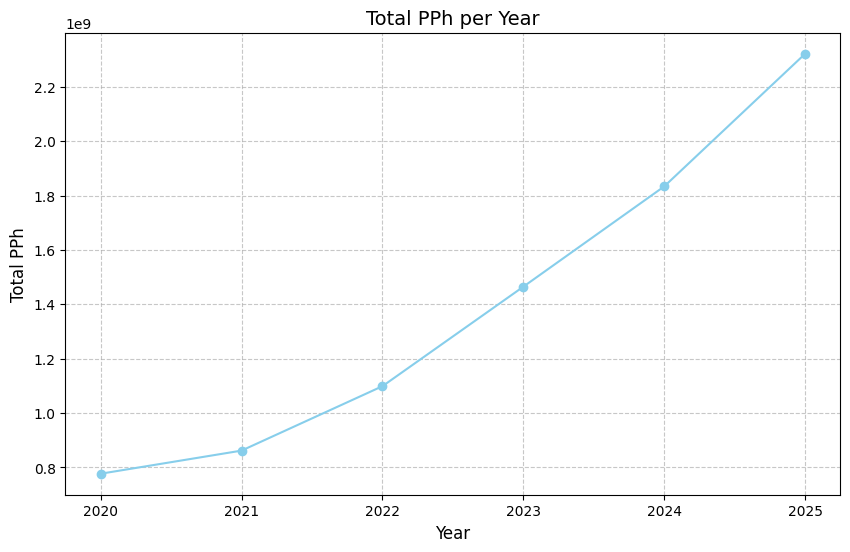

In [ ]:
import matplotlib.pyplot as plt

# Create the line chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(df_pph_per_year['tahun'], df_pph_per_year['laba_sebelum_pajak'], marker='o', linestyle='-', color='skyblue')

# Customize the chart
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total PPh", fontsize=12)
plt.title("Total PPh per Year", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the chart
plt.show()

## Summary:

### Q&A
No questions to answer.

### Data Analysis Key Findings
* The provided CSV file contains financial data, including yearly revenue, expenses, and PPh (Pajak Penghasilan) information.
* Several columns had missing values, particularly in the 'tahun' (year) and 'laba\_sebelum\_pajak' (profit before tax, likely representing PPh) columns, requiring data cleaning.
* Data types in several numerical columns were inconsistent (e.g., containing commas) and were corrected to numeric types for accurate calculations.
* The total PPh per year was calculated by grouping the data by year and summing the 'laba\_sebelum\_pajak' values.
* A line chart visualized the trend of total PPh over the years.

### Insights or Next Steps
* Investigate the reasons for missing data in the 'tahun' and 'laba\_sebelum\_pajak' columns. Imputation or removal may be necessary depending on the data's nature.
* Explore the relationship between PPh and other financial metrics (e.g., revenue, expenses) to identify potential correlations or patterns.
